Data Loading

In [2]:
from numpy.random import seed
seed(15)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.3.0


In [3]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
hepatitis_dataframe = pd.read_csv("/Users/haripriyakumar/Desktop/BAN676/Assignment 1/hepatitis.csv")

In [4]:
print("Shape of the Dataset:",hepatitis_dataframe.shape)

Shape of the Dataset: (615, 14)


In [5]:
hepatitis_dataframe.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
               ...   
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
Length: 14, dtype: object

All the columns except Category and Sex are numerical

In [6]:
hepatitis_dataframe = hepatitis_dataframe.drop("Unnamed: 0",axis=1) # we dont need the index column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14864ac10>,
      dtype=object)

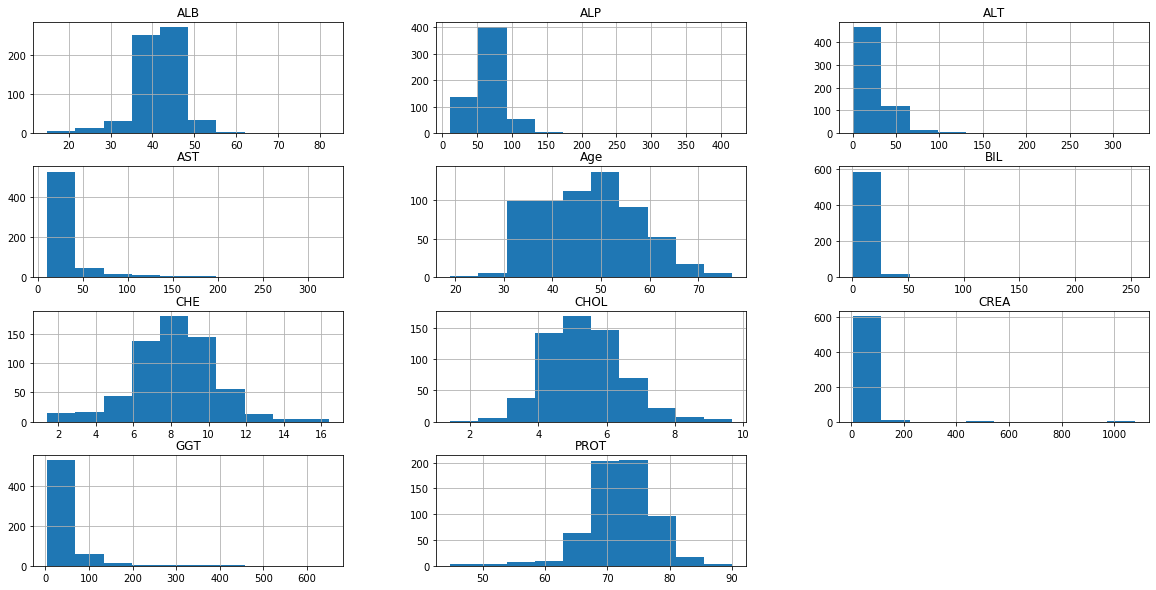

In [7]:
hepatitis_dataframe.hist(figsize=(20,10))

In [8]:
# percentage of null values in each column
hepatitis_dataframe[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']].isnull().sum()/hepatitis_dataframe.shape[0] * 100


ALB    0.2
ALP    2.9
ALT    0.2
AST    0.0
BIL    0.0
CHE    0.0
CHOL   1.6
CREA   0.0
GGT    0.0
PROT   0.2
dtype: float64

In [10]:
hepatitis_dataframe[1:20]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.2,4.8,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.8,5.2,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.3,4.7,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.2,4.3,76.0,29.9,68.7
5,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.9,6.0,111.0,91.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0=Blood Donor,33,m,41.8,65.0,33.1,38.0,6.6,8.8,4.4,71.0,24.0,72.7
16,0=Blood Donor,33,m,40.9,73.0,17.2,22.9,10.0,7.0,5.2,90.0,14.7,72.4
17,0=Blood Donor,33,m,45.2,88.3,32.4,31.2,10.1,9.8,5.5,102.0,48.5,76.5
18,0=Blood Donor,33,m,36.6,57.1,38.9,40.3,24.9,9.6,5.5,112.0,27.6,69.3


In [11]:
hepatitis_dataframe[["ALB","ALP","ALT","CHOL","PROT"]]=hepatitis_dataframe[["ALB","ALP","ALT","CHOL","PROT"]].fillna(hepatitis_dataframe[["ALB","ALP","ALT","CHOL","PROT"]].mean())

"ALB","ALP","ALT","CHOL","PROT" are the columns with few null values. They are filled in the gaps
where we have missing values

In [12]:
hepatitis_dataframe[["ALB","ALP","ALT","CHOL","PROT"]].isnull().sum()


ALB     0
ALP     0
ALT     0
CHOL    0
PROT    0
dtype: int64

In [13]:
hepatitis_dataframe = hepatitis_dataframe.reindex(
    np.random.permutation(hepatitis_dataframe.index)) #The permutation() method returns a re-arranged array

In [14]:

hepatitis_dataframe[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT',
                     'PROT']] = StandardScaler().fit_transform(hepatitis_dataframe[['Age','ALB','ALP','ALT','AST',
                     'BIL','CHE','CHOL','CREA','GGT','PROT']])


Transforming a categorical column into a one-hot encoded version

In [15]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
hepatitis_dataframe['Category']= label_encoder.fit_transform(hepatitis_dataframe['Category']) 
hepatitis_dataframe['Sex']= label_encoder.fit_transform(hepatitis_dataframe['Sex'])  


In [99]:
hepatitis_dataframe[['Category','Sex']]

,Category,Sex
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
610,4,0
611,4,0
612,4,0
613,4,0


In [100]:
hepatitis_dataframe['Category'].value_counts()

0    533
4     30
2     24
3     21
1      7
Name: Category, dtype: int64

In [14]:
hepatitis_dataframe.shape[1]

13